<div dir="rtl">
    
### מלאו את הקובץ ושלחו לרז

   - **ניתן למלא באנגלית או עברית**


     
###   מלאו את כל הסעיפים. הניקוד ינתן באופן הבא:
- **שם הפרויקט (3-4 מילים) - 5 נקודות** 
- **שמות מלאים של כל חברי הצוות, ללא ת.ז - 5 נקודות**
- **תיאור הפרויקט (3-4 משפטים) - 10 נקודות**
- **קישור למקור ממנו הורדתם את הנתונים - 10 נקודות**
- **קריאת הקובץ מהגיטהאב שלכם - 10 נקודות**
- **הסבר על מקור הנתונים - 10 נקודות**
- **תיאור קצר של הדאטה בעזרת הפקודות שנלמדו בקורס - 20 נקודות**
- **שלוש שאלות ראשוניות של דברים שהיה מעניין אתכם להוציא מהקובץ - 30 נקודות**
#### בהצלחה !
</div>

# Project Name: `ניתוח תאונות הדרכים בישראל עם נפגעים קל בשנים 2021-2023`


### Project team members: 
- `ויסמן מאור`
- `אלישיב סונר`
- `יותם יפרח`

### Project number: <insert here>
`10 (https://shorturl.at/b39GX)`

### Project description: 
2021-2023. 
המטרה היא להבין את המגמות והגורמים העיקריים לתאונות מסוג זה, תוך התמקדות במאפיינים גיאוגרפיים, זמניים וסוגי רכבים מעורבים. 
הניתוח יאפשר להפיק תובנות שיכולות לתרום לשיפור אמצעי הבטיחות והפחתת תאונות עתידיות.

### Link to the data: 
[הלישכה המרכזית לסטטיסטיקה](https://www.cbs.gov.il/he/publications/Pages/2015/%D7%AA%D7%95%D7%A6%D7%A8%D7%99-Public-Use-Files-PUF-%D7%A0%D7%AA%D7%95%D7%A0%D7%99-%D7%A4%D7%A8%D7%98-%D7%91%D7%9C%D7%AA%D7%99-%D7%9E%D7%96%D7%95%D7%94%D7%99%D7%9D-%D7%9C%D7%9E%D7%97%D7%A7%D7%A8.aspx)

https://raw.githubusercontent.com/MaorWN/FirstL/main/H20211163AccData.csv נתוני תאונות דרכים לשנת 2021
https://raw.githubusercontent.com/MaorWN/FirstL/main/H20221162AccData.csv נתוני תאונות דרכים לשנת 2022
https://raw.githubusercontent.com/MaorWN/FirstL/main/H20231161AccData.csv נתוני תאונות דרכים לשנת 2023

https://raw.githubusercontent.com/MaorWN/FirstL/main/accdata.csv

### Explain the data source:
##### הנתונים נאספו מהלמ"ס לאחר הגשת טופס בקשה הכולל הסבר על מטרת השימוש בו.
##### לאחר קבלת האישור התקבלו קישורים נפרדים להורדת הנתונים עבור כל שנה.
##### בנוסף לנתונים התקבל גם קובץ עזר המסביר את הערכים המופיעים בקבצי הנתונים שהתקבלו (codebook)
##### הנתונים מכילים רק את התאונות שהוגדרו כתאונה עם **נפגעים קל** ולכן התובנות שנגיע אליהן הן רק על הבסיס הזה.

----

#### Read you file from Github:

In [9]:
import pandas as pd

url_list = [
    r'https://raw.githubusercontent.com/MaorWN/FirstL/main/H20211163AccData.csv',
    r'https://raw.githubusercontent.com/MaorWN/FirstL/main/H20221162AccData.csv',
    r'https://raw.githubusercontent.com/MaorWN/FirstL/main/H20231161AccData.csv'
]

# קריאת כל הקבצים
accdata = pd.concat([pd.read_csv(url, encoding='cp1255') for url in url_list], ignore_index=True)

# בקוד זה יש המרה של הערכים הנמצאים בטבלה הראשית בטבלת ההמרה הנמצאת בקובץ קודבוק ולאחר מכן נוכל לעבוד עם 
# accdata לכל אורך הפרויקט

codebook = pd.read_csv("https://raw.githubusercontent.com/MaorWN/FirstL/main/Codebook.csv", encoding="cp1255")

# ניקוי רווחים משמות העמודות
codebook.columns = codebook.columns.str.strip()

# טיפול בעמודות מתוך הקודבוק
for col_name in codebook['שם משתנה'].dropna().unique():
    if col_name in accdata.columns:
        relevant_rows = codebook[codebook['שם משתנה'] == col_name]
        mapping_df = relevant_rows.drop_duplicates(subset='קוד')
        mapping = dict(zip(mapping_df['קוד'], mapping_df['מאפיינים']))
        
        # החלפת הערכים בטבלה הראשית
        accdata[col_name] = accdata[col_name].map(mapping).fillna(accdata[col_name])


# accdata.info()



#### Describe the data
* How many rows?
* How many columns?
* How many numeric columns? (not including numerical identifiers - numbers that uniquely define the row)
* How many categorical columns? (not including string identifiers -  values that uniquely define the row)

In [4]:
num_rows = accdata.shape[0]
print(f"Number of rows: {num_rows}")

Number of rows: 129486


In [5]:
num_columns = accdata.shape[1]
print(f"Number of columns: {num_columns}")

Number of columns: 49


In [5]:
# חישוב עמודות מספריות
numeric_columns = [col for col in accdata.columns if pd.api.types.is_numeric_dtype(accdata[col])]

# חישוב עמודות קטגוריאליות (מעודכן כדי לשלול את האזהרה)
categorical_columns = [col for col in accdata.columns if isinstance(accdata[col].dtype, pd.CategoricalDtype) or accdata[col].dtype == 'object']

# נשלול את עמודות המזהים הייחודיים (כאשר כל הערכים בעמודה ייחודיים)
non_unique_numeric_columns = [col for col in numeric_columns if accdata[col].nunique() != len(accdata)]

non_unique_categorical_columns = [col for col in categorical_columns if accdata[col].nunique() != len(accdata)]

# הצגת התוצאות
print(f"Number of numeric columns (excluding unique identifiers): {len(non_unique_numeric_columns)}")
print(f"Number of categorical columns (excluding string identifiers): {len(non_unique_categorical_columns)}")

Number of numeric columns (excluding unique identifiers): 21
Number of categorical columns (excluding string identifiers): 27


#### Write three questions you would like to answer using this data

1. `מה הן סוגי התאונות הנפוצות ביותר על פני שלושת השנים ומתי הן קורות`

2. `האם יש שינוי במהלך שלושת השנים הנסקרות בסוגי התאונות`

3. ` באילו מקומות יש הכי הרבה תאונות, הנתונים כאן מתייחסים לתאונות בכל רחבי הארץ, האם יש כאן מחזוריות שניתן לחזות מראש שייתכן שיהיו שם עוד תאונות וניתן יהיה למנוע אותן?`

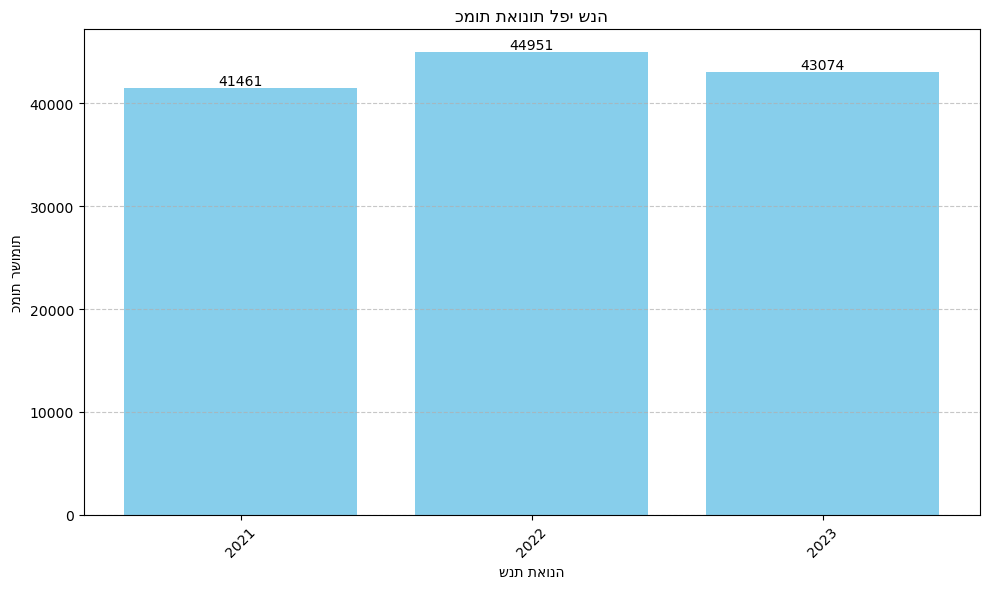

In [8]:
import matplotlib.pyplot as plt

# ספירת כמות מופעים לכל שנה
counts = accdata['SHNAT_TEUNA'].value_counts().sort_index()

# ציור הגרף
plt.figure(figsize=(10,6))
bars = plt.bar(counts.index.astype(str), counts.values, color='skyblue')

# הוספת הערכים בתוך הגרף
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(int(yval)), ha='center', va='bottom', fontsize=10)

plt.xlabel('שנת תאונה')
plt.ylabel('כמות רשומות')
plt.title('כמות תאונות לפי שנה')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [2]:
# בקוד זה יש המרה של הערכים הנמצאים בטבלה הראשית בטבלת ההמרה הנמצאת בקובץ קודבוק ולאחר מכן נוכל לעבוד עם 
# accdata לכל אורך הפרויקט

import pandas as pd


codebook = pd.read_csv("https://raw.githubusercontent.com/MaorWN/FirstL/main/Codebook.csv", encoding="cp1255")

# ניקוי רווחים משמות העמודות
codebook.columns = codebook.columns.str.strip()

# טיפול בעמודות מתוך הקודבוק
for col_name in codebook['שם משתנה'].dropna().unique():
    if col_name in accdata.columns:
        relevant_rows = codebook[codebook['שם משתנה'] == col_name]
        mapping_df = relevant_rows.drop_duplicates(subset='קוד')
        mapping = dict(zip(mapping_df['קוד'], mapping_df['מאפיינים']))
        
        # החלפת הערכים בטבלה הראשית
        accdata[col_name] = accdata[col_name].map(mapping).fillna(accdata[col_name])


accdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129486 entries, 0 to 129485
Data columns (total 49 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pk_teuna_fikt      129486 non-null  int64  
 1   sug_tik            129486 non-null  object 
 2   THUM_GEOGRAFI      129486 non-null  object 
 3   SUG_DEREH          129486 non-null  object 
 4   SEMEL_YISHUV       129486 non-null  float64
 5   REHOV1             64512 non-null   float64
 6   REHOV2             7903 non-null    float64
 7   BAYIT              86234 non-null   float64
 8   ZOMET_IRONI        7901 non-null    float64
 9   KVISH1             35087 non-null   float64
 10  KVISH2             34526 non-null   float64
 11  KM                 33698 non-null   float64
 12  ZOMET_LO_IRONI     10809 non-null   float64
 13  YEHIDA             129486 non-null  object 
 14  SHNAT_TEUNA        129486 non-null  int64  
 15  HODESH_TEUNA       129486 non-null  float64
 16  YO

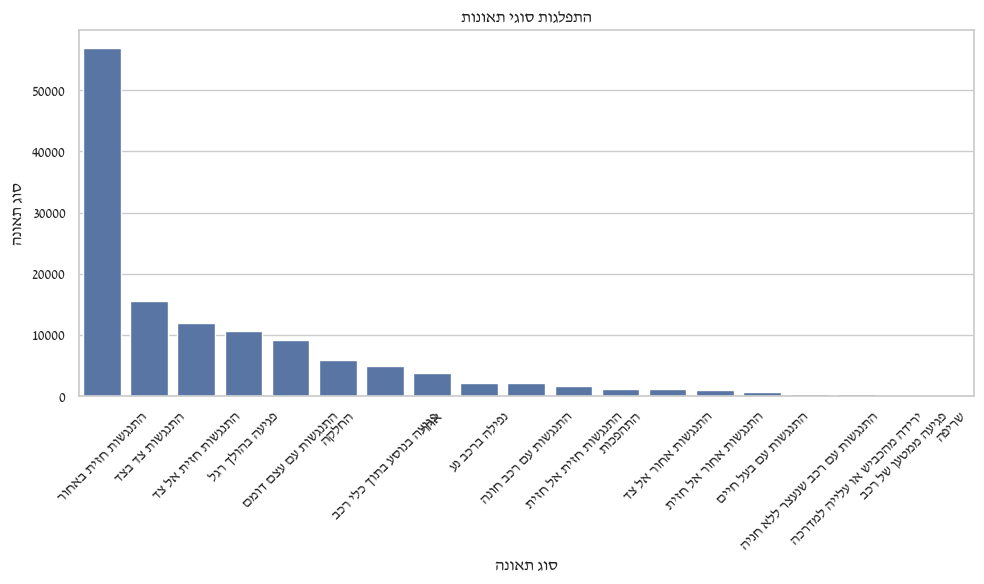

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper

# עיצוב בסיסי לגרפים
sns.set(style="whitegrid", font="David")  # תומך בעברית
plt.rcParams['axes.unicode_minus'] = False  # תומך בסימנים שליליים בעברית


def reshape_hebrew(text):
    return get_display(arabic_reshaper.reshape(text))
    
title =  reshape_hebrew("התפלגות סוגי תאונות")
xlabel = reshape_hebrew("סוג תאונה")
ylabel =  reshape_hebrew("סוג תאונה")

plt.figure(figsize=(10, 6))
sns.countplot(data=accdata, x='SUG_TEUNA', order=accdata['SUG_TEUNA'].value_counts().index)
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\m15w116\AppData\Local\Temp\ipykernel_21252\1794773772.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


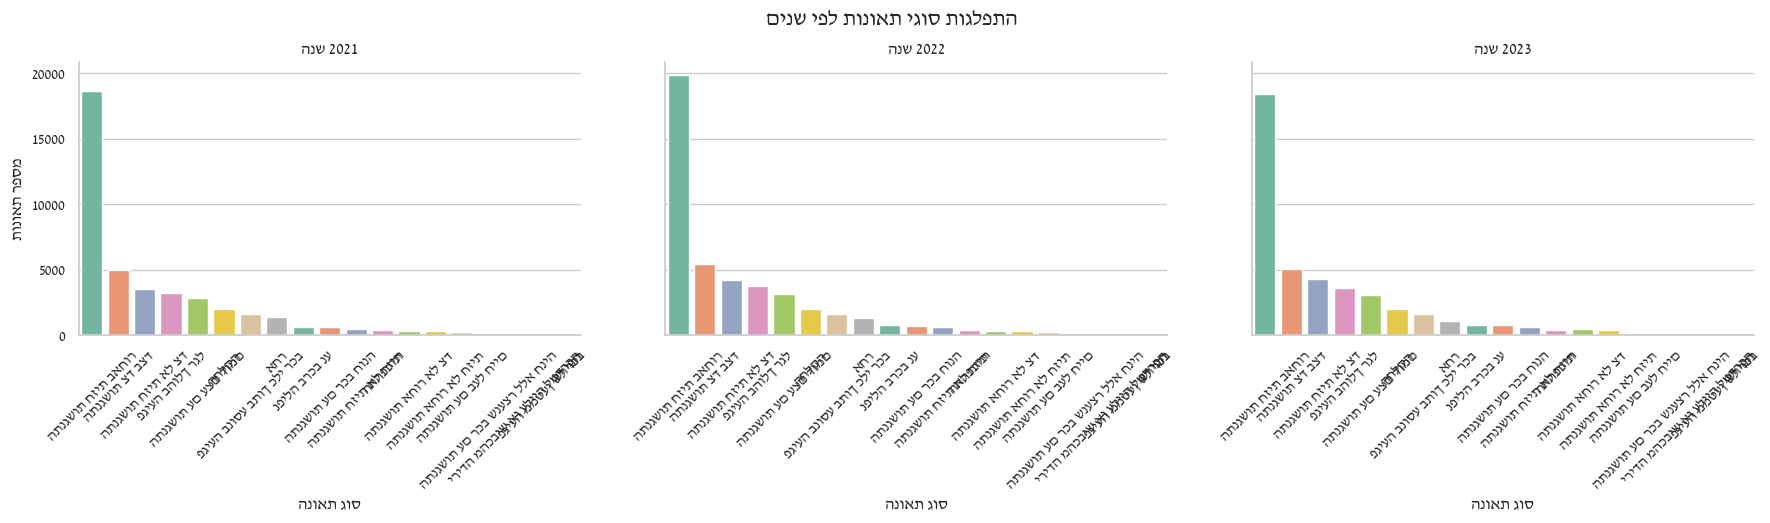

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

# הגדרת פונקציה לעיבוד טקסט בעברית
def reshape_hebrew(text):
    return get_display(arabic_reshaper.reshape(text))

# עיצוב
sns.set(style="whitegrid", font="David")
plt.rcParams['axes.unicode_minus'] = False

# עיבוד טקסטים לעברית
title = reshape_hebrew("התפלגות סוגי תאונות לפי שנים")
xlabel = reshape_hebrew("סוג תאונה")
ylabel = reshape_hebrew("מספר תאונות")
col_title = reshape_hebrew("שנה")

# נוודא שעמודת השנה קיימת
if 'SHNAT_TEUNA' in accdata.columns:
    # נוודא שהשמות בעמודות מעובדים כראוי (עברית בצירים)
    accdata['SUG_TEUNA'] = accdata['SUG_TEUNA'].apply(lambda x: reshape_hebrew(str(x)) if pd.notna(x) else x)
    accdata['SHNAT_TEUNA'] = accdata['SHNAT_TEUNA'].astype(str)

    # יצירת גרף עם חלוקה לפי שנה
    g = sns.catplot(
        data=accdata,
        x='SUG_TEUNA',
        kind='count',
        col='SHNAT_TEUNA',
        col_wrap=3,
        height=4,
        aspect=1.5,
        order=accdata['SUG_TEUNA'].value_counts().index,
        palette='Set2'
    )

    g.set_titles(col_template=col_title + " {col_name}")
    g.set_axis_labels(xlabel, ylabel)
    for ax in g.axes.flat:
        ax.tick_params(axis='x', rotation=45)

    plt.subplots_adjust(top=0.85)
    g.fig.suptitle(title, fontsize=16)
    plt.show()
else:
    print("עמודת SHNAT_TEUNA לא קיימת בנתונים.")

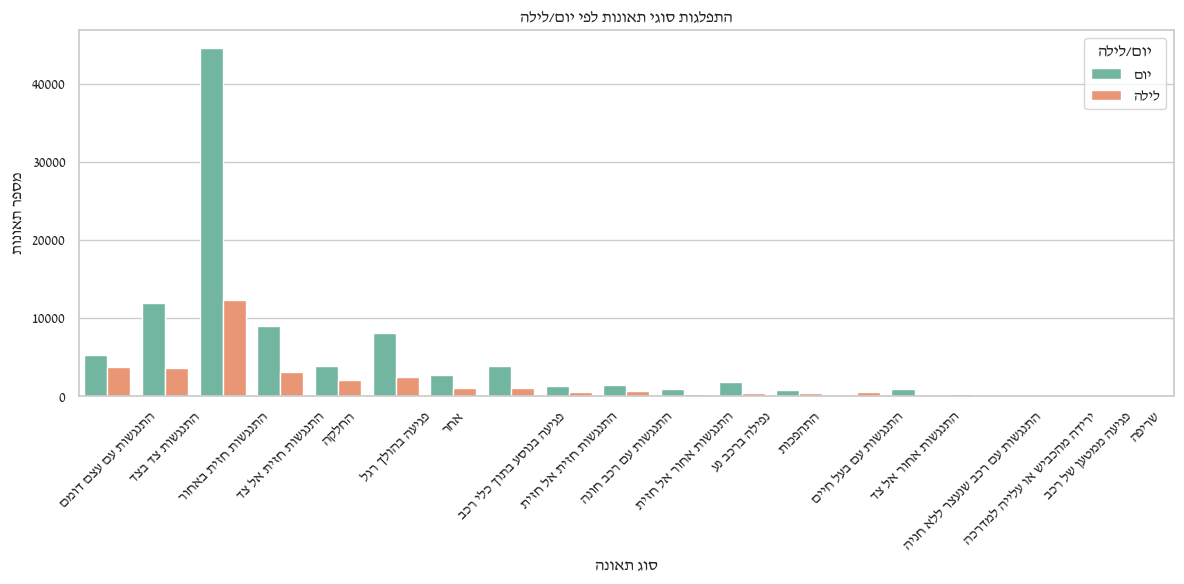

In [10]:
#!pip install arabic-reshaper python-bidi
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

# פונקציה לעיבוד טקסטים בעברית
def reshape_hebrew(text):
    return get_display(arabic_reshaper.reshape(text))

# דוגמה לגרף עם טקסטים בעברית מעובדים
plt.rcParams['font.family'] = 'David' 
# עיבוד שמות הצירים והכותרות
xlabel = reshape_hebrew("סוג תאונה")
ylabel = reshape_hebrew("מספר תאונות")
title = reshape_hebrew("התפלגות סוגי תאונות לפי יום/לילה")
legend_title = reshape_hebrew("יום/לילה")

# עיבוד של שמות הקטגוריות בציר X
accdata['SUG_TEUNA'] = accdata['SUG_TEUNA'].apply(lambda x: reshape_hebrew(str(x)) if pd.notna(x) else x)
accdata['YOM_LAYLA'] = accdata['YOM_LAYLA'].apply(lambda x: reshape_hebrew(str(x)) if pd.notna(x) else x)

# ציור הגרף
plt.figure(figsize=(12, 6))
sns.countplot(data=accdata, x='SUG_TEUNA', hue='YOM_LAYLA', palette='Set2')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.legend(title=legend_title)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<div style="background-color: #f0f0f0; padding: 10px; border-radius: 5px;">
  <span style="color: red;"><strong>— Do not proceed beyond this point. This is for the next steps, do not fill in —</strong></span>
</div>


---
### <span style="color:green"> Observation 1:</span>

>
> 
>
> 


---

---
### <span style="color:green"> Observation 2:</span>

>
> 
>
> 


---

---
### <span style="color:green"> Observation 3:</span>

>
> 
>
> 


---

---
### <span style="color:green"> Summary</span>

> Anything you'd like to say - your conclusions, summary, how hard you worked etc.
> 
>    
>   
   

---